# Excercise 4a

## 1.1 Euclidean distance

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

In [10]:
def calc_dissimilarity_matrix(data):
    diss_matrix = np.empty((data.shape[0], data.shape[0]))

    for i in range(data.shape[0]):
        diff = data - data[i]
        squared = diff ** 2
        summed = np.sum(squared, axis=1)
        distance = np.sqrt(summed)
        diss_matrix[i] = distance

    display(pd.DataFrame(diss_matrix))
    return diss_matrix


dissimilarity_matrix = calc_dissimilarity_matrix(data)

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,59.556696,54.129474,47.571000,50.338852,43.908997,48.559242,56.000000,44.395946,40.804412,...,39.874804,49.749372,52.640289,51.458721,49.989999,36.249138,26.627054,50.378567,37.067506,47.031904
1,59.556696,0.000000,41.629317,45.475268,47.906158,47.127487,40.286474,50.960769,48.620983,52.820451,...,52.009614,48.969378,42.965102,32.572995,47.707442,51.390661,59.177699,38.587563,48.569538,50.328918
2,54.129474,41.629317,0.000000,53.953684,52.096065,55.443665,45.650849,49.335586,42.602817,54.836119,...,59.076222,47.927028,46.335731,39.191836,46.936127,51.826634,52.009614,38.340579,50.774009,43.954522
3,47.571000,45.475268,53.953684,0.000000,51.215232,33.660065,47.254629,56.824291,42.449971,45.166359,...,37.934153,55.569776,50.099900,43.988635,58.566202,40.286474,55.551778,49.527770,44.147480,41.267421
4,50.338852,47.906158,52.096065,51.215232,0.000000,54.147945,36.959437,59.481089,52.507142,55.054518,...,48.620983,26.172505,55.794265,48.723711,31.416556,53.981478,51.449004,46.882833,52.668776,50.970580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,36.249138,51.390661,51.826634,40.286474,53.981478,29.325757,52.191953,55.605755,40.037482,36.262929,...,31.749016,54.543561,55.758407,48.083261,55.488738,0.000000,41.940434,46.151923,23.537205,40.963398
1793,26.627054,59.177699,52.009614,55.551778,51.449004,49.325450,45.354162,60.456596,48.041649,47.265209,...,43.416587,45.912961,53.272882,52.449976,46.324939,41.940434,0.000000,46.957428,42.438190,46.465041
1794,50.378567,38.587563,38.340579,49.527770,46.882833,46.904158,33.466401,54.516053,34.885527,49.929951,...,45.077711,46.421978,33.896903,29.189039,42.602817,46.151923,46.957428,0.000000,44.158804,28.879058
1795,37.067506,48.569538,50.774009,44.147480,52.668776,32.557641,48.207883,55.928526,37.000000,28.827071,...,38.183766,50.507425,54.359912,47.265209,48.754487,23.537205,42.438190,44.158804,0.000000,39.420807


In [11]:
def calc_prec_recall_matrix(diss_mat, ys):
    prec_mat = np.empty((data.shape[0], data.shape[0]))
    recall_mat = np.empty((data.shape[0], data.shape[0]))
    prec_gain_mat = np.empty((data.shape[0], data.shape[0]))
    recall_gain_mat = np.empty((data.shape[0], data.shape[0]))

    n_i = np.array([np.sum(ys == ys[i]) for i in range(data.shape[0])])
    n = ys.shape[0]
    for m in range(1, data.shape[0] + 1):
        s = np.argsort(diss_mat)[:, :m]
        classes = ys[s]
        true_pos = np.sum((classes.transpose() == ys), axis=0)
        false_pos = np.sum((classes.transpose() != ys), axis=0)

        prec = true_pos / (true_pos + false_pos)
        recall = true_pos / n_i

        zero = np.zeros(prec.shape[0])

        prec_gain = np.maximum(zero, ((n / n_i) - (1 / prec)) / (n / n_i - 1))
        recall_gain = np.maximum(zero, ((n / n_i) - (1 / recall)) / (n / n_i - 1))

        prec_mat[:, m - 1] = prec
        recall_mat[:, m - 1] = recall

        prec_gain_mat[:, m - 1] = prec_gain
        recall_gain_mat[:, m - 1] = recall_gain

    return prec_mat, recall_mat, prec_gain_mat, recall_gain_mat


prec_mat, recall_mat, prec_gain_mat, recall_gain_mat = calc_prec_recall_matrix(dissimilarity_matrix, target)


In [12]:
def show_p_r_auc(precision_matrix, recall_matrix):
    for k in range(10):
        cls = np.where(target == k)[0]

        p_k = precision_matrix[cls, :]
        r_k = recall_matrix[cls, :]
        p_k_mean = np.mean(p_k, axis=0)
        r_k_mean = np.mean(r_k, axis=0)

        indices = np.argsort(r_k_mean)

        Y = p_k_mean[indices]
        X = r_k_mean[indices]

        dy = (Y[:-1] + Y[1:]) / 2
        dx = X[1:] - X[:-1]
        auc = np.sum(dy * dx)

        plt.scatter(x=r_k_mean, y=p_k_mean)
        plt.title(f'Class {k} with AUC = {auc}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.show()

Precision-Recall diagram with AUC:

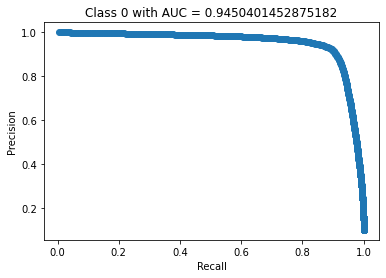

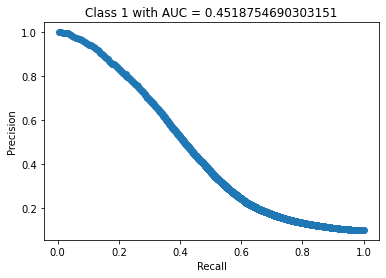

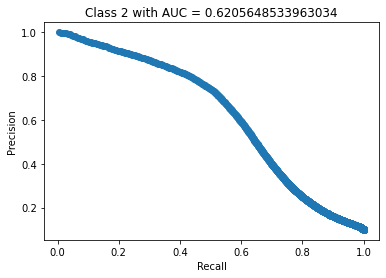

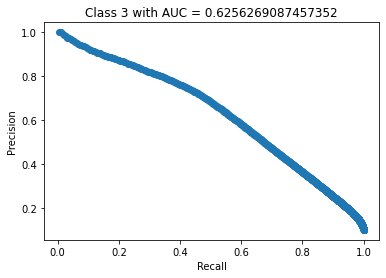

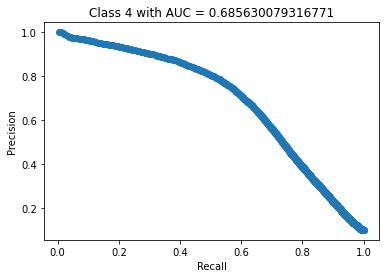

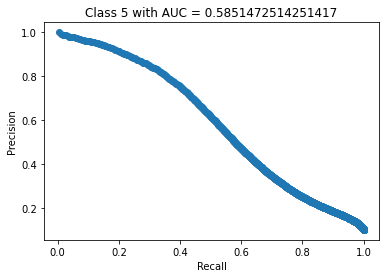

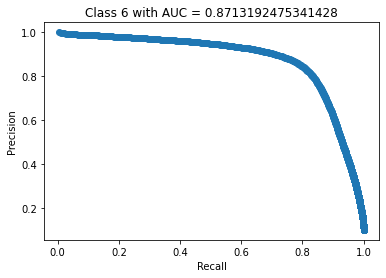

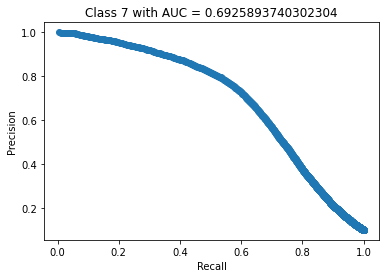

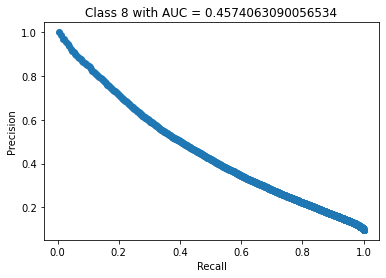

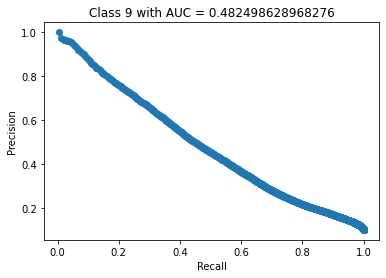

In [13]:
show_p_r_auc(prec_mat, recall_mat)

Precision-Recall diagram with AUC of precision and recall gain:

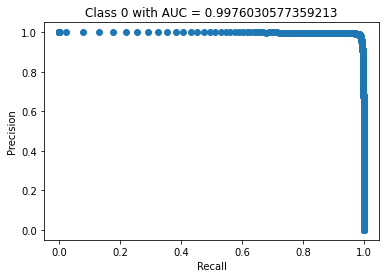

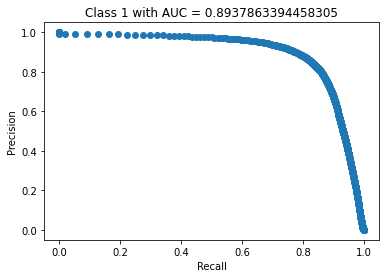

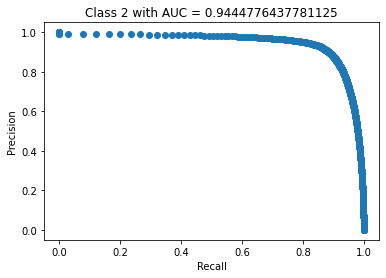

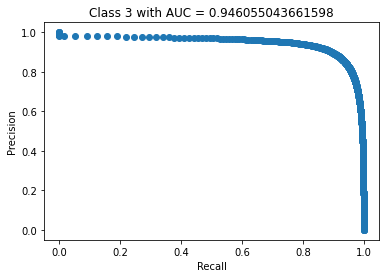

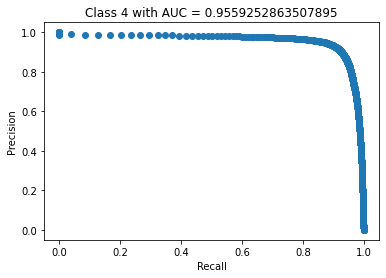

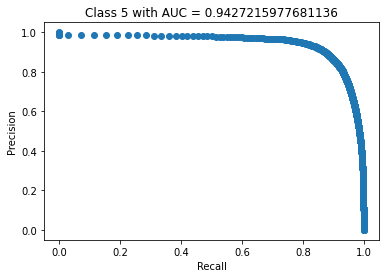

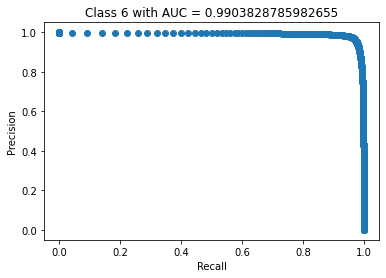

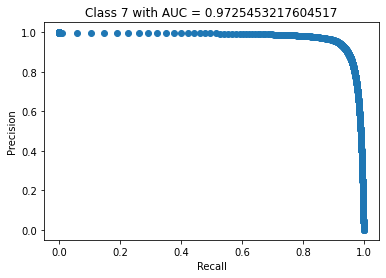

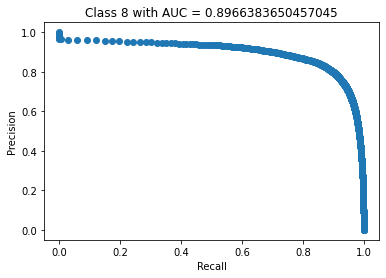

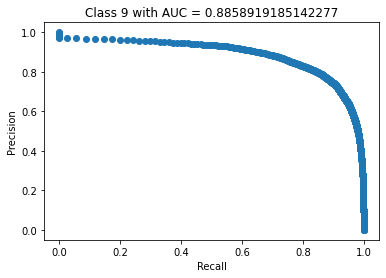

In [14]:
show_p_r_auc(prec_gain_mat, recall_gain_mat)

## Hand crafted distances

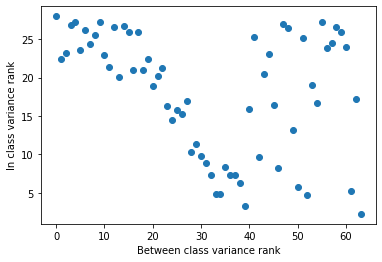

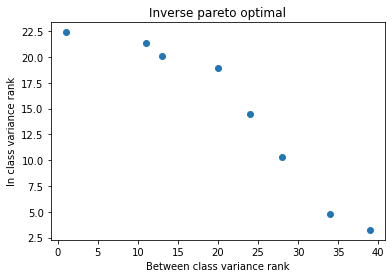

,0,1
0,45.0,28.00
1,10.0,22.40
2,28.0,23.15
3,29.0,26.80
4,35.0,27.20
...,...,...
59,20.0,25.95
60,21.0,24.05
61,32.0,5.20
62,62.0,17.20


Selected features 60 & 33


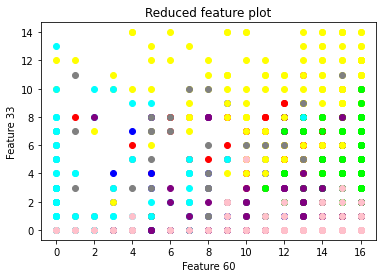

In [15]:
best_in_class_variances = np.empty((10, 64))
for k in range(10):
    X = data[target == k]
    in_class_variance = np.var(X, axis=0)
    best_in_class_variances[k] = np.argsort(in_class_variance)

means_per_class = np.empty((10, 64))
for k in range(10):
    X = data[target == k]
    mean = np.mean(data, axis=0)
    means_per_class[k] = mean

between_class_variances = np.var(means_per_class, axis=0)
between_class_variances_ind = np.argsort(between_class_variances)[::-1]
ranking = np.array(
    [[var_ind, np.average(np.where(best_in_class_variances == var_ind))] for var_ind in between_class_variances_ind])

rank_y = np.array(ranking.transpose()[1])

pareto_ranks = []

for i in range(64):
    y_i = np.argmin(rank_y[i] < np.delete(rank_y, i))
    if i < y_i:
        pareto_ranks.append((i, ranking.transpose()[1][i]))

pareto_ranks = np.array(pareto_ranks)

plt.scatter(x=[i for i in range(64)], y=ranking.transpose()[1])
plt.xlabel('Between class variance rank')
plt.ylabel('In class variance rank')
plt.show()

plt.scatter(x=pareto_ranks.transpose()[0], y=pareto_ranks.transpose()[1])
plt.title('Inverse pareto optimal')
plt.xlabel('Between class variance rank')
plt.ylabel('In class variance rank')
plt.show()

display(pd.DataFrame(ranking))

feature_1_rank = int(pareto_ranks.transpose()[0][2])
feature_2_rank = int(pareto_ranks.transpose()[0][4])
feature_1 = int(ranking.transpose()[0][feature_1_rank])
feature_2 = int(ranking.transpose()[0][feature_2_rank])

print(f'Selected features {feature_1} & {feature_2}')

transformed_data = data.transpose()[[feature_1, feature_2]].transpose()

colors = ['red', 'blue', 'magenta', 'green', 'yellow', 'grey', 'lime', 'cyan', 'purple', 'pink']
for k in range(10):
    cls_data = transformed_data[target == k]
    plt.scatter(x=cls_data.transpose()[0], y=cls_data.transpose()[1], c=colors[k])
plt.title('Reduced feature plot')
plt.xlabel(f'Feature {feature_1}')
plt.ylabel(f'Feature {feature_2}')
plt.show()

,0,1,2,3,4,5,6,7,8,9,...,1787,1788,1789,1790,1791,1792,1793,1794,1795,1796
0,0.000000,7.810250,4.123106,5.830952,6.000000,7.810250,7.071068,10.440307,7.071068,5.830952,...,4.000000,8.944272,5.000000,5.385165,10.000000,7.071068,5.000000,5.830952,7.810250,6.403124
1,7.810250,0.000000,5.099020,3.000000,5.000000,0.000000,1.000000,16.124515,1.000000,3.000000,...,6.082763,13.152946,6.000000,4.000000,13.000000,1.000000,8.246211,3.000000,0.000000,2.000000
2,4.123106,5.099020,0.000000,2.236068,6.403124,5.099020,4.123106,11.045361,4.123106,2.236068,...,1.000000,12.369317,1.414214,1.414214,13.000000,4.123106,7.615773,2.236068,5.099020,3.162278
3,5.830952,3.000000,2.236068,0.000000,5.830952,3.000000,2.000000,13.152946,2.000000,0.000000,...,3.162278,13.038405,3.000000,1.000000,13.341664,2.000000,8.062258,0.000000,3.000000,1.000000
4,6.000000,5.000000,6.403124,5.830952,0.000000,5.000000,5.099020,16.278821,5.099020,5.830952,...,7.211103,8.246211,7.810250,6.403124,8.000000,5.099020,3.605551,5.830952,5.000000,5.385165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,7.071068,1.000000,4.123106,2.000000,5.099020,1.000000,0.000000,15.132746,0.000000,2.000000,...,5.099020,13.038405,5.000000,3.000000,13.038405,0.000000,8.062258,2.000000,1.000000,1.000000
1793,5.000000,8.246211,7.615773,8.062258,3.605551,8.246211,8.062258,15.231546,8.062258,8.062258,...,8.062258,5.000000,8.944272,8.246211,5.385165,8.062258,0.000000,8.062258,8.246211,8.000000
1794,5.830952,3.000000,2.236068,0.000000,5.830952,3.000000,2.000000,13.152946,2.000000,0.000000,...,3.162278,13.038405,3.000000,1.000000,13.341664,2.000000,8.062258,0.000000,3.000000,1.000000
1795,7.810250,0.000000,5.099020,3.000000,5.000000,0.000000,1.000000,16.124515,1.000000,3.000000,...,6.082763,13.152946,6.000000,4.000000,13.000000,1.000000,8.246211,3.000000,0.000000,2.000000


/tmp/ipykernel_851639/4150676245.py:20: RuntimeWarning: divide by zero encountered in true_divide
  prec_gain = np.maximum(zero, ((n / n_i) - (1 / prec)) / (n / n_i - 1))
/tmp/ipykernel_851639/4150676245.py:21: RuntimeWarning: divide by zero encountered in true_divide
  recall_gain = np.maximum(zero, ((n / n_i) - (1 / recall)) / (n / n_i - 1))


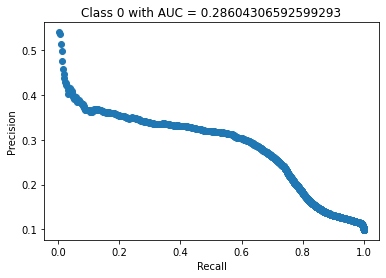

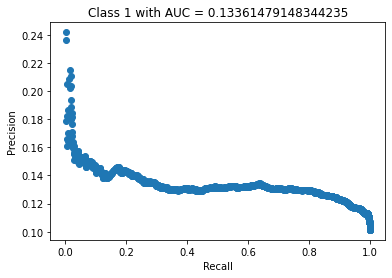

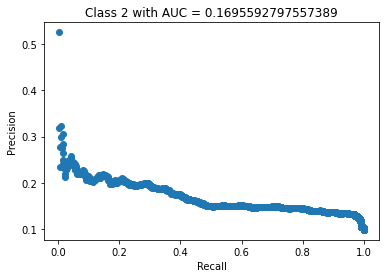

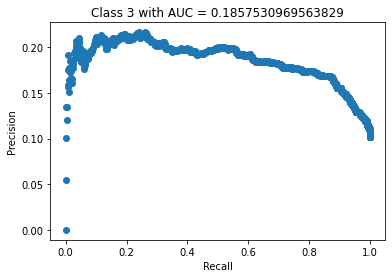

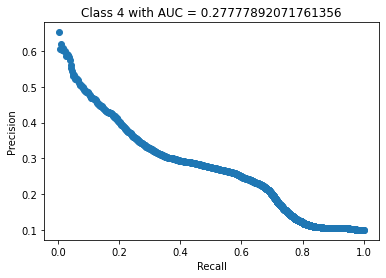

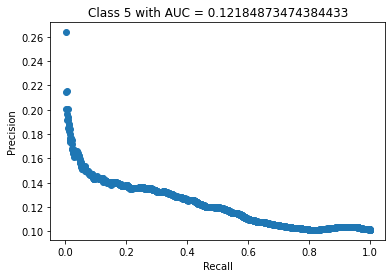

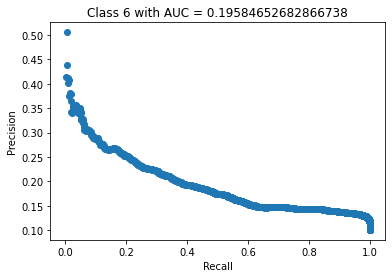

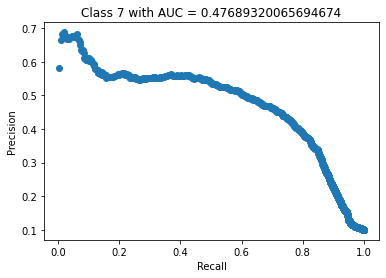

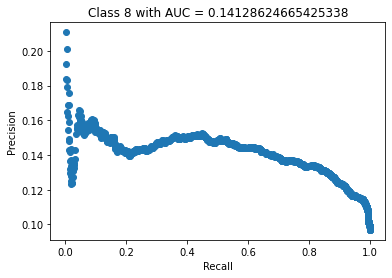

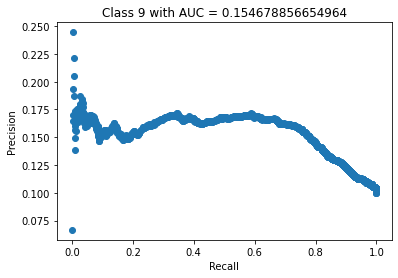

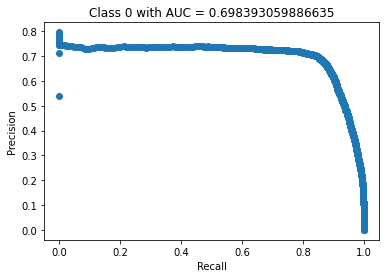

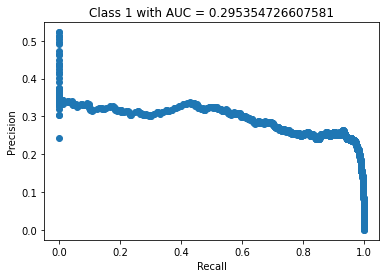

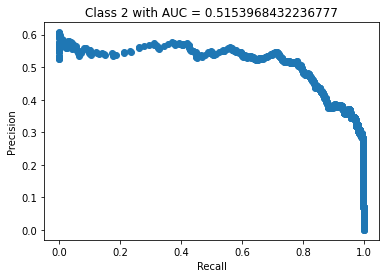

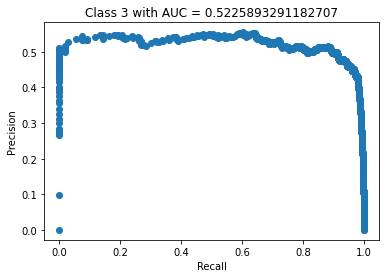

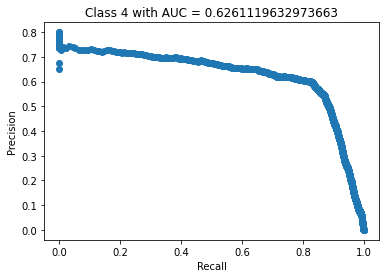

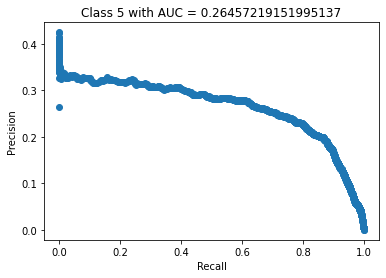

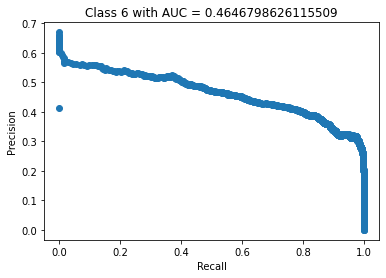

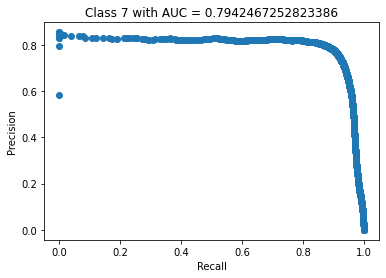

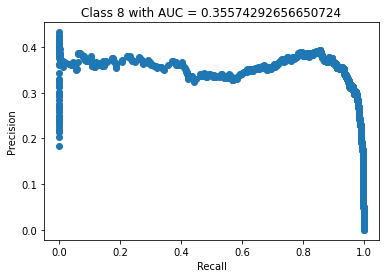

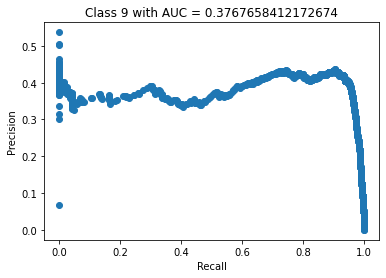

In [16]:
red_diss_matrix = calc_dissimilarity_matrix(transformed_data)
red_prec_mat, red_recall_mat, red_prec_gain_mat, red_recall_gain_mat = calc_prec_recall_matrix(red_diss_matrix, target)
show_p_r_auc(red_prec_mat, red_recall_mat)
show_p_r_auc(red_prec_gain_mat, red_recall_gain_mat)

## 2 Red Cards Study
### 2.1 Loading and Cleaning the Data
We first load the data from the csv file and introspect the first player to get an idea for what the data looks like.

In [2]:
import pandas as pd
import numpy as np

rawData = pd.read_csv('crowdsourcing/CrowdstormingDataJuly1st.csv')
display(rawData.loc[0])
display(rawData.columns)

playerShort             lucas-wilchez
player                  Lucas Wilchez
club                    Real Zaragoza
leagueCountry                   Spain
birthday                   31.08.1983
height                          177.0
weight                           72.0
position         Attacking Midfielder
games                               1
victories                           0
ties                                0
defeats                             1
goals                               0
yellowCards                         0
yellowReds                          0
redCards                            0
photoID                     95212.jpg
rater1                           0.25
rater2                            0.5
refNum                              1
refCountry                          1
Alpha_3                           GRC
meanIAT                      0.326391
nIAT                            712.0
seIAT                        0.000564
meanExp                         0.396
nExp        

Index(['playerShort', 'player', 'club', 'leagueCountry', 'birthday', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp'],
      dtype='object')

The data was originally arranged in player-referee-combinations. We decided to restructure it with one player per row in order to investigate correlations between the characteristics of players and the amount of red cards they receive.

All referee-focused data like referee country was dropped.

The racial bias indices were deemed not directly relevant as the existence of such a bias in referee decisions is the object of the investigation in the first place.

The skin color rating of the players was determined by taking the average of the two ratings provided. Since the raters tend to disagree somewhat more toward the lighter end of the spektrum than the darker one this method could potentially introduce some statistical skew to the data. However with the rating system being so subjective in the first place any such effect can be assumed to be negligible.
The age is calculated by subtracting the birth date from 2014 as the data is from 2014. The birthday data is removed afterwards as well as `player`, `yellowCards`, `photoID`, `rater1`, `rater2`, `refNum`, `refCountry`, `Alpha_3`, `meanIAT`, `nIAT`, `seIAT`, `meanExp`, `nExp`, and `seExp` as they are not relevant for prediction (anymore).
Then the game data for each player is aggregated with the groupBy and join function and one hot encoding is applied for `leagueCountry`, `club` and `position`.
Last but not least, the labels/target is calculated by the proportion of red cards per game

In [3]:
def clean_data(dat: pd.DataFrame) -> (pd.DataFrame, np.ndarray):
    dat = dat.copy()
    # Combining the data from the raters by applying mean
    dat['rating'] = dat.loc[:, ["rater1", "rater2"]].mean(axis=1)
    # Calculate age by subtracting the age of the data (2014) from the birthdays
    dat['age'] = dat.birthday.apply(lambda date: 2014 - int(date.split('.')[-1]))
    # Dropping irrelevant features
    dat.drop(
        [
            'player', 'birthday', 'yellowCards', 'yellowReds', 'photoID', 'rater1', 'rater2',
            'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp'
        ],
        axis=1,
        inplace=True
    )
    # drop rows with missing values
    dat.dropna(axis=0, inplace=True)
    display(dat)
    # Data aggregation per player
    group = dat.groupby(['playerShort'])
    summed_columns = group[['games', 'victories', 'ties', 'defeats', 'goals', 'redCards']].sum()
    other_columns = dat[['playerShort', 'club', 'leagueCountry', 'height', 'weight', 'position', 'rating', 'age']].drop_duplicates()
    res = summed_columns.join(other_columns.set_index('playerShort'), on='playerShort')

    one_hot = res.copy()

    # One hot encoding
    countries = np.unique(one_hot['leagueCountry'])
    clubs = np.unique(one_hot['club'])
    positions = np.unique(one_hot['position'])

    for country in countries:
        one_hot[country] = one_hot['leagueCountry'].apply(lambda c: int(country == c))

    for club in clubs:
        one_hot[club] = one_hot['club'].apply(lambda c: int(club == c))

    for position in positions:
        one_hot[position] = one_hot['position'].apply(lambda p: int(position == p))

    one_hot.drop(['leagueCountry', 'club', 'position'], axis=1, inplace=True)

    labels = np.array(res.loc[:, 'redCards'] / res.loc[:, 'games'])

    return one_hot, labels


data, target = clean_data(rawData)
display(data.head())
display(target)

,playerShort,club,leagueCountry,height,weight,position,games,victories,ties,defeats,goals,redCards,rating,age
0,lucas-wilchez,Real Zaragoza,Spain,177.0,72.0,Attacking Midfielder,1,0,0,1,0,0,0.375,31
1,john-utaka,Montpellier HSC,France,179.0,82.0,Right Winger,1,0,0,1,0,0,0.750,32
5,aaron-hughes,Fulham FC,England,182.0,71.0,Center Back,1,0,0,1,0,0,0.125,35
6,aleksandar-kolarov,Manchester City,England,187.0,80.0,Left Fullback,1,1,0,0,0,0,0.125,29
7,alexander-tettey,Norwich City,England,180.0,68.0,Defensive Midfielder,1,0,0,1,0,0,1.000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146022,tom-huddlestone,Tottenham Hotspur,England,188.0,80.0,Defensive Midfielder,1,0,1,0,0,0,0.500,28
146023,tomas-rosicky,Arsenal FC,England,178.0,67.0,Attacking Midfielder,1,1,0,0,1,0,0.000,34
146024,winston-reid,West Ham United,England,190.0,87.0,Center Back,1,0,0,1,0,0,0.375,26
146025,xherdan-shaqiri,Bayern München,Germany,169.0,72.0,Left Midfielder,1,1,0,0,0,0,0.250,23


/tmp/ipykernel_67132/2386871398.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  one_hot[position] = one_hot['position'].apply(lambda p: int(position == p))


,games,victories,ties,defeats,goals,redCards,height,weight,rating,age,...,Center Forward,Center Midfielder,Defensive Midfielder,Goalkeeper,Left Fullback,Left Midfielder,Left Winger,Right Fullback,Right Midfielder,Right Winger
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,654,247,179,228,9,0,182.0,71.0,0.125,35,...,0,0,0,0,0,0,0,0,0,0
aaron-hunt,336,141,73,122,62,1,183.0,73.0,0.125,28,...,0,0,0,0,0,0,0,0,0,0
aaron-lennon,412,200,97,115,31,0,165.0,63.0,0.250,27,...,0,0,0,0,0,0,0,0,1,0
aaron-ramsey,260,150,42,68,39,1,178.0,76.0,0.000,24,...,0,1,0,0,0,0,0,0,0,0
abdelhamid-el-kaoutari,124,41,40,43,1,2,180.0,73.0,0.250,24,...,0,0,0,0,0,0,0,0,0,0


array([0.        , 0.00297619, 0.        , ..., 0.01518987, 0.04255319,
       0.        ])

### 2.2 Model creation
For the regression forest we use the tree and forest implementation from exercise 4 and adapt it in parts.
We need to adjust the node splitting and the creation of leaf nodes as well as the train method of the tree and the predict method of the forest.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold


def make_lin_reg_split_node(node, feature_indices):
    '''
    node: the node to be split
    feature_indices: a numpy array of length 'D_try', containing the feature
                     indices to be considered in the present split
    '''
    n, D = node.data.shape

    e_min = float('inf')
    t_min, j_min = 0, 0

    # find best feature j (among 'feature_indices') and best threshold t for the split
    for j in feature_indices:
        data_unique = np.unique(node.data[:, j])
        tj = 0.5 * (data_unique[1:] + data_unique[:-1])

        if len(data_unique) > 1:
            for t in tj:
                indices_l = np.where(node.data[:, j] <= t)
                indices_r = np.where(node.data[:, j] > t)

                labels_l = node.labels[indices_l]
                labels_r = node.labels[indices_r]

                labels_l_mean = np.mean(labels_l)
                labels_r_mean = np.mean(labels_r)

                # Minimizing the squared error insteadof the gini impurity
                err_left = np.sum((labels_l - labels_l_mean) ** 2)
                err_right = np.sum((labels_r - labels_r_mean) ** 2)

                if err_left + err_right < e_min:
                    e_min = err_left + err_right
                    t_min = t
                    j_min = j

    # create children
    left = Node()
    right = Node()

    # initialize 'left' and 'right' with the data subsets and labels
    # according to the optimal split found above
    indices_l = np.where(node.data[:, j_min] <= t_min)
    indices_r = np.where(node.data[:, j_min] > t_min)

    left.data = node.data[indices_l]  # data in left node
    left.labels = node.labels[indices_l]  # corresponding labels
    right.data = node.data[indices_r]
    right.labels = node.labels[indices_r]

    # if len(left.data) == 0 or len(right.data) == 0:
    #     print('Data empty')

    # turn the current 'node' into a split node
    # (store children and split condition)
    node.left = left
    node.right = right
    node.feature = j_min
    node.threshold = t_min

    # return the children (to be placed on the stack)
    return left, right


def make_lin_reg_leaf_node(node):
    '''
    node: the node to become a leaf
    '''
    # compute and store leaf response
    node.N = len(node.labels)
    # Returning the mean
    node.response = np.mean(node.labels)


class Node:
    pass


class Tree:
    def __init__(self):
        self.root = Node()

    def find_leaf(self, x) -> Node:
        node = self.root
        while hasattr(node, "feature"):
            j = node.feature
            if x[j] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node


class RegressionTree(Tree):
    def __init__(self):
        super(RegressionTree, self).__init__()

    def train(self, data, labels, n_min=5):
        '''
        data: the feature matrix for all digits
        labels: the corresponding ground-truth responses
        n_min: termination criterion (don't split if a node contains fewer instances)
        '''
        N, D = data.shape
        D_try = int(np.sqrt(D))  # how many features to consider for each split decision

        # initialize the root node
        self.root.data = data
        self.root.labels = labels

        stack = [self.root]
        while len(stack):
            # print(f'Stack size: {len(stack)}')
            node = stack.pop()
            n = node.data.shape[0]  # number of instances in present node
            # Got rid of the node_is_pure() function, because it's not needed anymore
            # print(f'N of current train node {n}')
            if n >= n_min:
                # print('Node splitted')
                # Call 'make_decision_split_node()' with 'D_try' randomly selected
                # feature indices. This turns 'node' into a split node
                # and returns the two children, which must be placed on the 'stack'.
                indices = np.random.choice(np.arange(0, D), D_try, False)
                left, right = make_lin_reg_split_node(node, indices)
                stack.append(left)
                stack.append(right)
            else:
                # print('Leaf node created')
                # Call 'make_decision_leaf_node()' to turn 'node' into a leaf node.
                make_lin_reg_leaf_node(node)

    def predict(self, x):
        leaf = self.find_leaf(x)
        # compute p(y | x)
        return np.argmax(leaf.response)


class RegressionForest():
    def __init__(self, n_trees):
        # create ensemble
        self.trees = [RegressionTree() for i in range(n_trees)]

    def train(self, data, labels, n_min=20):
        for i, tree in enumerate(self.trees):
            # train each tree, using a bootstrap sample of the da
            # print(f'Training decision tree {i}')
            train_indices = np.random.choice(range(len(data)), len(data), True)
            train_data = data[train_indices]
            train_labels = labels[train_indices]
            tree.train(train_data, train_labels, n_min)
            # print(f'Decision tree {i} trained')

    def predict(self, x):
        # compute the ensemble prediction
        return np.mean([tree.predict(x) for tree in self.trees])

Testing the linear regression and regression forest. Therefore k-fold is applied with 10 splits for both the regression forest and the linear regression implemented with sklearn.
For both the mean error and standard deviation of the error is calculated.

In [9]:
def calc_mean_squared_error(pred, target):
    return np.sum((pred - target) ** 2) / len(pred)


def evaluate_reg_forest(data, target, n_trees=10, n_splits=10):
    k_fold = KFold(n_splits, shuffle=True)

    errs = []

    for i, indices in enumerate(k_fold.split(data)):
        train_i, test_i = indices
        train_x, train_y = data[train_i], target[train_i]
        test_x, test_y = data[test_i], target[test_i]

        reg_forest = RegressionForest(n_trees)
        # print(f'Train regression forest for fold {i}')
        reg_forest.train(train_x, train_y)
        # print(f'Regression forest trained')

        # print(f'Predict regression forest for fold {i}')
        test_pred_y = np.array([reg_forest.predict(test_x_i) for test_x_i in test_x])
        # print(f'Regression forest predicted')

        err = calc_mean_squared_error(test_pred_y, test_y)
        errs.append(err)

    return np.mean(errs), np.std(errs)


def evaluate_lin_reg(data, target, n_splits=10):
    k_fold = KFold(n_splits, shuffle=True)
    lin_reg = LinearRegression()

    errs = []

    for train_i, test_i in k_fold.split(data):
        train_x, train_y = data[train_i], target[train_i]
        test_x, test_y = data[test_i], target[test_i]

        lin_reg.fit(train_x, train_y)

        test_pred_y = lin_reg.predict(test_x)

        err = calc_mean_squared_error(test_pred_y, test_y)
        errs.append(err)

    return np.mean(errs), np.std(errs)


lin_reg_err, lin_reg_std = evaluate_lin_reg(data.values, target)
reg_forest_err, reg_forest_std = evaluate_reg_forest(data.values, target)

print(f'Linear regression k-fold error: {lin_reg_err} ± {lin_reg_std}')
print(f'Regression forest k-fold error: {reg_forest_err} ± {reg_forest_std}')

/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Linear regression k-fold error: 1.2697222148565548e-05 ± 4.458662704044889e-06
Regression forest k-fold error: 5.482820615104197e-05 ± 1.262315804835226e-05


## 2.3 Answering the Research Question

In [14]:
lin_reg_errs = []
reg_forest_errs = []

for i in range(19):
    print(f'Shuffle {i}')
    shuffled = data.copy()
    shuffled['rating'] = np.random.permutation(shuffled['rating'].values)

    err_lin_reg, _ = evaluate_lin_reg(shuffled.values, target)
    err_reg_forest, _ = evaluate_reg_forest(shuffled.values, target)

    lin_reg_errs.append(err_lin_reg)
    reg_forest_errs.append(err_reg_forest)

lin_reg_higher = np.sum(lin_reg_errs > lin_reg_err)
reg_forest_higher = np.sum(reg_forest_errs > reg_forest_err)

print(f'{lin_reg_higher} of 19 permutated datasets have a higher error than the unpermutated for the linear regression')
print(
    f'{reg_forest_higher} of 19 permutated datasets have a higher error than the unpermutated for the regression forest')

Shuffle 0


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 1


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 2


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 3


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 4


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 5


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 6


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 7


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 8


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 9


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 10


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 11


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 12


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 13


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 14


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 15


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 16


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 17


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shuffle 18


/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/simon/PycharmProjects/fml/venv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


5 of 19 permutated datasets have a higher error than the unpermutated for the linear regression
13 of 19 permutated datasets have a higher error than the unpermutated for the regression forest


For both the linear regression and the regression forest we calculated less than 19 times a higher error for the permutated dataset than for the unpermutated. Therefore there is no clear bias for the skin color.
